In [45]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import math

In [46]:
def rgb2hsi(rgb):
    # separar
    R,G,B= cv2.split(rgb)
    # normalizar
    R =R/255
    G =G/255
    B =B/255
    # cantidad de elementos
    x=R.shape[0]
    y=R.shape[1]
    # crear arrays
    r=np.empty([x,y])
    g=np.empty([x,y])
    b=np.empty([x,y])
    H=np.empty([x,y])
    S=np.empty([x,y])
    I=np.empty([x,y])

    # recorrer
    for i in range(0, x):
        for j in range(0,y):
            # calcular rgb
            divisor=R[i,j]+G[i,j]+B[i,j]
            I[i,j]=divisor/3.0
            if (divisor != 0.0):
                r[i,j]=R[i,j]/divisor
                g[i,j]=G[i,j]/divisor
                b[i,j]=B[i,j]/divisor
                
            # calcular RGB
            if (R[i,j]==G[i,j]) and (G[i,j]==B[i,j]):
                H[i,j]=0
                S[i,j]=0
            else:
                argum=(R[i,j]-G[i,j])*(R[i,j]-G[i,j])+(R[i,j]-B[i,j])*(G[i,j]-B[i,j])
                num=0.5*((R[i,j]-G[i,j]) + (R[i,j]-B[i,j]))
                w=num/math.sqrt(argum)
                if (w>1): w=1
                if (w<-1): w=-1
                    
                H[i,j]=math.acos(w)
                if H[i,j] < 0:
                    print('b')
                    break
                    
                if B[i,j] > G[i,j]:
                    H[i,j]=2*math.pi-H[i,j]
                
                if (r[i,j] <= g[i,j]) & (r[i,j] <= b[i,j]): 
                    S[i,j]=1-3*r[i,j]
                if (g[i,j] <= r[i,j]) & (g[i,j] <= b[i,j]): 
                    S[i,j]=1-3*g[i,j]
                if (b[i,j] <= r[i,j]) & (b[i,j] <= g[i,j]): 
                    S[i,j]=1-3*b[i,j]
                    
    #H*=179
    #S*=255
    #I*=255
    hsi=cv2.merge([H,S,I])
    return hsi

In [47]:
def hsi2rgb(hsi):
    H,S,I = cv2.split(hsi)
    #H=H/179
    #S=S/255
    #I=I/255
    x=H.shape[0]
    y=H.shape[1]
    R=np.empty([x,y])
    G=np.empty([x,y])
    B=np.empty([x,y])
    r=np.empty([x,y])
    g=np.empty([x,y])
    b=np.empty([x,y])

       
    for i in range(0, x):
        for j in range(0,y):
            if (S[i,j] >1): S[i,j]=1
            if (I[i,j] >1): I[i,j]=1
            if (S[i,j] ==0): 
                R[i,j]=I[i,j]
                G[i,j]=I[i,j]
                B[i,j]=I[i,j]
            else:
                ums=(1-S[i,j])/3
                if (H[i,j]>=0) and (H[i,j]<np.radians(120)):
                    b[i,j]=ums
                    r[i,j]= 1/3*(1+(S[i,j]*np.cos(H[i,j])/np.cos(np.radians(60)-H[i,j])))
                    g[i,j]=1-r[i,j]-b[i,j]
                elif (H[i,j]>=np.radians(120)) and (H[i,j]<np.radians(240)):
                    H[i,j]-=np.radians(120)
                    r[i,j]=ums
                    g[i,j]=1/3*(1+(S[i,j]*np.cos(H[i,j])/np.cos(np.radians(60)-H[i,j])))
                    b[i,j]=1-r[i,j]-g[i,j]
                elif (H[i,j]>=np.radians(240)) and (H[i,j]<np.radians(360)):
                    H[i,j]-=np.radians(240)
                    g[i,j]=ums
                    b[i,j]=1/3*(1+(S[i,j]*np.cos(H[i,j])/np.cos(np.radians(60)-H[i,j])))
                    r[i,j]=1-g[i,j]-b[i,j]
                else:
                    print("fuera de rango")
                    break
                if (r[i,j]<0): r[i,j]=0
                if (g[i,j]<0): g[i,j]=0
                if (b[i,j]<0): b[i,j]=0
                R[i,j]=3*I[i,j]*r[i,j]
                G[i,j]=3*I[i,j]*g[i,j]
                B[i,j]=3*I[i,j]*b[i,j]
                if (R[i,j]>1): R[i,j]=1
                if (G[i,j]>1): G[i,j]=1
                if (B[i,j]>1): B[i,j]=1 
    rgb=cv2.merge([R,G,B])*255
    return rgb.astype(np.uint8)

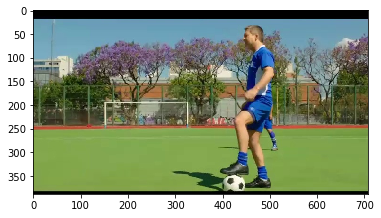

In [48]:
#Imagen Original
imagen = cv2.imread("img/5.jpg")
mi_rgb= cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB)
plt.imshow(mi_rgb)

True

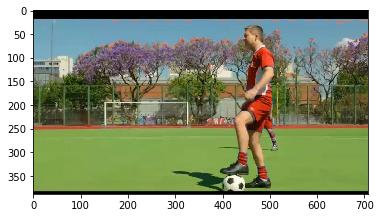

In [53]:
# Realizar conversión
mi_hsi= rgb2hsi(mi_rgb) # RGB a HSI 
h,s,i = cv2.split(mi_hsi)

# Realizar el cambio de color
h=np.where((h>=640/179) & (h<=822/179),30/179,h)
mi_hsi=cv2.merge([h,s,i])

n_rgb= hsi2rgb(mi_hsi) # HSI a RGB
plt.imshow(n_rgb)

# Guardar
final=cv2.cvtColor(n_rgb, cv2.COLOR_RGB2BGR)
cv2.imwrite('result/hsi.png',final)

In [56]:
video= cv2.VideoCapture('video/tafirol.mp4')

fps=video.get(cv2.CAP_PROP_FPS)
codec =cv2.VideoWriter_fourcc(*'XVID')
size = (int(video.get(cv2.CAP_PROP_FRAME_WIDTH)),
        int(video.get(cv2.CAP_PROP_FRAME_HEIGHT)))
nuevoVideo= cv2.VideoWriter('result/hsi.mp4',codec,fps,size)  

i=0
success, frame2 = video.read()
while success:
    i+=1
    # hacemos el cambio solo de un segmento del video
    if (i>=53) & (i<224):
        print(i,"trabajando")
        mi_rgb= cv2.cvtColor(frame2, cv2.COLOR_BGR2RGB)
        mi_hsi= rgb2hsi(mi_rgb) # RGB a HSI 
        h,s,j = cv2.split(mi_hsi)
        h=np.where((h>=640/179) & (h<=822/179),30/179,h)
        nuevo_hsi= cv2.merge([h,s,j])
        nuevo_rgb= hsi2rgb(nuevo_hsi)
        nuevo_bgr= cv2.cvtColor(nuevo_rgb, cv2.COLOR_RGB2BGR)
        nuevoVideo.write(nuevo_bgr)
    success, frame2 = video.read()

    
video.release()
nuevoVideo.release()

53 trabajando
54 trabajando
55 trabajando
56 trabajando
57 trabajando
58 trabajando
59 trabajando
60 trabajando
61 trabajando
62 trabajando
63 trabajando
64 trabajando
65 trabajando
66 trabajando
67 trabajando
68 trabajando
69 trabajando
70 trabajando
71 trabajando
72 trabajando
73 trabajando
74 trabajando
75 trabajando
76 trabajando
77 trabajando
78 trabajando
79 trabajando
80 trabajando
81 trabajando
82 trabajando
83 trabajando
84 trabajando
85 trabajando
86 trabajando
87 trabajando
88 trabajando
89 trabajando
90 trabajando
91 trabajando
92 trabajando
93 trabajando
94 trabajando
95 trabajando
96 trabajando
97 trabajando
98 trabajando
99 trabajando
100 trabajando
101 trabajando
102 trabajando
103 trabajando
104 trabajando
105 trabajando
106 trabajando
107 trabajando
108 trabajando
109 trabajando
110 trabajando
111 trabajando
112 trabajando
113 trabajando
114 trabajando
115 trabajando
116 trabajando
117 trabajando
118 trabajando
119 trabajando
120 trabajando
121 trabajando
122 trabajan